In [3]:
### Python Packages
#This cell imports all the necessary Python libraries for data processing, visualization, 
#natural language processing (NLP), and machine learning. 
#It ensures all dependencies are loaded at the start for seamless notebook execution.

In [33]:
# Used Packages
import pandas as pd         # For data manipulation and handling
import numpy as np          # For numerical computations
import matplotlib.pyplot as plt  # For visualizations
import seaborn as sns       # For enhanced visualizations
from sklearn.model_selection import train_test_split  # For splitting datasets
from sklearn.feature_extraction.text import TfidfVectorizer  # For text vectorization
from sklearn.linear_model import LogisticRegression  # For training the ML model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # For evaluation
import nltk                 # For natural language processing (NLP)
import string
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

import joblib








# Download necessary NLTK data
nltk.download('stopwords')





[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pouyasmac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# Load datasets
fake_df = pd.read_csv('data/fake.csv')  # Replace 'data/' with the path to your fake.csv file
true_df = pd.read_csv('data/true.csv')  # Replace 'data/' with the path to your true.csv file

# Display the first few rows of each dataset
print("Fake News Dataset:")
print(fake_df.head())



Fake News Dataset:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  


In [6]:
print("\nTrue News Dataset:")
print(true_df.head())


True News Dataset:
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   



1.2 Add Labels
We will add a label column to each dataset:

label = 0 for fake news.
label = 1 for true news.

In [7]:
# Add labels
fake_df['label'] = 0  # Fake news
true_df['label'] = 1  # True news


In [8]:
fake_df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [9]:
true_df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1



1.3 Combine the Datasets
Concatenate the two datasets into a single DataFrame.

In [10]:
# Combine datasets
df = pd.concat([fake_df, true_df], ignore_index=True)

# Shuffle the dataset to mix fake and true news
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the first few rows of the combined dataset
print("Combined Dataset:")
print(df.head())


Combined Dataset:
                                               title  \
0  Ben Stein Calls Out 9th Circuit Court: Committ...   
1  Trump drops Steve Bannon from National Securit...   
2  Puerto Rico expects U.S. to lift Jones Act shi...   
3   OOPS: Trump Just Accidentally Confirmed He Le...   
4  Donald Trump heads for Scotland to reopen a go...   

                                                text       subject  \
0  21st Century Wire says Ben Stein, reputable pr...       US_News   
1  WASHINGTON (Reuters) - U.S. President Donald T...  politicsNews   
2  (Reuters) - Puerto Rico Governor Ricardo Rosse...  politicsNews   
3  On Monday, Donald Trump once again embarrassed...          News   
4  GLASGOW, Scotland (Reuters) - Most U.S. presid...  politicsNews   

                  date  label  
0    February 13, 2017      0  
1       April 5, 2017       1  
2  September 27, 2017       1  
3         May 22, 2017      0  
4       June 24, 2016       1  



1.4 Explore the Dataset
Perform basic exploration to understand the structure of the data.

In [11]:
# Check the shape of the dataset
print("Dataset Shape:", df.shape)

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check class distribution
print("\nClass Distribution:")
print(df['label'].value_counts())


Dataset Shape: (44898, 5)

Missing Values:
title      0
text       0
subject    0
date       0
label      0
dtype: int64

Class Distribution:
label
0    23481
1    21417
Name: count, dtype: int64


In [12]:
df.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [13]:
# Keep only the necessary columns: 'text' and 'label'
df = df[['text', 'label']]

# Display the first few rows
print(df.head())


                                                text  label
0  21st Century Wire says Ben Stein, reputable pr...      0
1  WASHINGTON (Reuters) - U.S. President Donald T...      1
2  (Reuters) - Puerto Rico Governor Ricardo Rosse...      1
3  On Monday, Donald Trump once again embarrassed...      0
4  GLASGOW, Scotland (Reuters) - Most U.S. presid...      1


2.2 Check for Missing Values
Handle any missing values in the dataset.

In [14]:
# Check for missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

# Drop rows with missing text
df = df.dropna(subset=['text'])

# Confirm there are no missing values
print("Missing values after cleaning:")
print(df.isnull().sum())


Missing values before cleaning:
text     0
label    0
dtype: int64
Missing values after cleaning:
text     0
label    0
dtype: int64


In [15]:

# Preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text



In [16]:
# Apply preprocessing to the 'text' column
df['cleaned_text'] = df['text'].apply(preprocess_text)

# Display the first few rows after cleaning
print(df[['text', 'cleaned_text', 'label']].head())

                                                text  \
0  21st Century Wire says Ben Stein, reputable pr...   
1  WASHINGTON (Reuters) - U.S. President Donald T...   
2  (Reuters) - Puerto Rico Governor Ricardo Rosse...   
3  On Monday, Donald Trump once again embarrassed...   
4  GLASGOW, Scotland (Reuters) - Most U.S. presid...   

                                        cleaned_text  label  
0  21st century wire says ben stein reputable pro...      0  
1  washington reuters us president donald trump r...      1  
2  reuters puerto rico governor ricardo rossello ...      1  
3  monday donald trump embarrassed country accide...      0  
4  glasgow scotland reuters us presidential candi...      1  


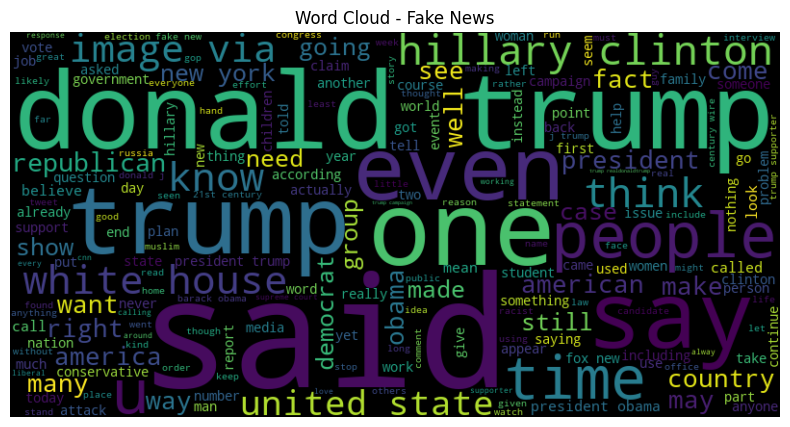

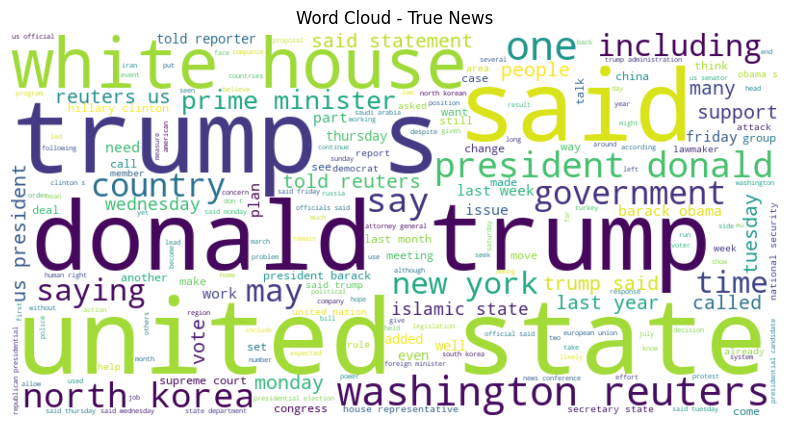

In [19]:

# Generate word clouds for fake and true news
fake_words = ' '.join(df[df['label'] == 0]['cleaned_text'])
true_words = ' '.join(df[df['label'] == 1]['cleaned_text'])

# Word Cloud for Fake News
fake_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(fake_words)
plt.figure(figsize=(10, 5))
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.title("Word Cloud - Fake News")
plt.axis('off')
plt.show()

# Word Cloud for True News
true_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(true_words)
plt.figure(figsize=(10, 5))
plt.imshow(true_wordcloud, interpolation='bilinear')
plt.title("Word Cloud - True News")
plt.axis('off')
plt.show()

In [21]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_text'],  # Features: cleaned text
    df['label'],         # Target: labels
    test_size=0.2,       # Use 20% of data for testing
    random_state=42      # For reproducibility
)


In [22]:
# Display the shapes of the resulting splits
print("Training data shape:", X_train.shape, y_train.shape)

Training data shape: (35918,) (35918,)


In [23]:
# Display the shapes of the resulting splits
print("Testing data shape:", X_test.shape, y_test.shape)


Testing data shape: (8980,) (8980,)


In [24]:
# Check class distribution in training and testing sets
print("Training set class distribution:")
print(y_train.value_counts())

print("\nTesting set class distribution:")
print(y_test.value_counts())


Training set class distribution:
label
0    18771
1    17147
Name: count, dtype: int64

Testing set class distribution:
label
0    4710
1    4270
Name: count, dtype: int64


###Feature Extraction

In [26]:
# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Use the top 5000 features

In [27]:
# Fit and transform training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform testing data
X_test_tfidf = vectorizer.transform(X_test)

# Display the shape of the resulting matrices
print("TF-IDF matrix for training data:", X_train_tfidf.shape)
print("TF-IDF matrix for testing data:", X_test_tfidf.shape)


TF-IDF matrix for training data: (35918, 5000)
TF-IDF matrix for testing data: (8980, 5000)


In [28]:
# Get the feature names
feature_names = vectorizer.get_feature_names_out()

# Display the first 10 features
print("Sample TF-IDF features:")
print(feature_names[:10])


Sample TF-IDF features:
['10' '100' '1000' '10000' '100000' '11' '12' '13' '14' '15']


In [30]:
# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence warning occurs

# Train the model on the TF-IDF transformed training data
model.fit(X_train_tfidf, y_train)

print("Model training completed!")

Model training completed!


In [31]:
# Make predictions on the testing data
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9871937639198218

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4710
           1       0.98      0.99      0.99      4270

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



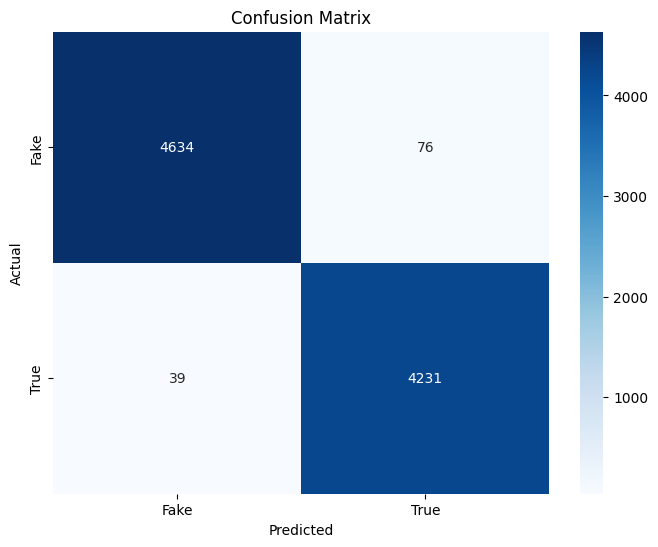

In [32]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Testing Report Explanation
Accuracy:

Value: 98.72%
Indicates the percentage of correctly classified news articles out of all articles in the testing set. A high accuracy reflects strong overall model performance.
Precision:

Fake News (0): 0.99
True News (1): 0.98
Precision measures how many of the articles predicted as fake (or true) are actually fake (or true). High precision for both classes suggests that the model avoids false positives.
Recall:

Fake News (0): 0.98
True News (1): 0.99
Recall measures how many of the actual fake (or true) articles are correctly identified by the model. High recall indicates the model minimizes false negatives.
F1-Score:

Fake News (0): 0.99
True News (1): 0.99
The F1-score is the harmonic mean of precision and recall. A high F1-score shows a strong balance between these metrics.
Support:

Fake News (0): 4710 articles
True News (1): 4270 articles
Represents the number of articles in each class in the testing set. A balanced support ensures fair evaluation.

In [34]:
# Save the trained model
joblib.dump(model, 'logistic_regression_model.pkl')
print("Model saved as logistic_regression_model.pkl")

Model saved as logistic_regression_model.pkl


In [35]:
# Save the TF-IDF vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
print("Vectorizer saved as tfidf_vectorizer.pkl")

Vectorizer saved as tfidf_vectorizer.pkl


In [36]:
# Load the saved model and vectorizer
loaded_model = joblib.load('logistic_regression_model.pkl')
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Example prediction
sample_text = ["The government has announced new policies to improve healthcare."]  # Replace with any text
sample_text_tfidf = loaded_vectorizer.transform(sample_text)
prediction = loaded_model.predict(sample_text_tfidf)

print("Prediction:", "Fake News" if prediction[0] == 0 else "True News")


Prediction: True News
